In [1]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
n_train, n_test , num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = tf.Variable(tf.random.normal(mean=1, shape=(num_inputs, 1)))
    b = tf.Variable(tf.zeros(shape=(1,)))
    return [w, b]

In [4]:
def l2_penalty(w):
    return tf.reduce_sum(tf.pow(w, 2)) / 2

In [12]:
def train_concise(wd):
    net = tf.keras.models.Sequential()
    net.add(
        tf.keras.layers.Dense(1,kernel_regularizer = tf.keras.regularizers.l2(wd))
    )
    net.build(input_shape=(1, num_inputs))
    w, b = net.trainable_variables
    loss = tf.keras.losses.MeanSquaredError()
    num_epochs, lr =  100, 0.003
    trainer = tf.keras.optimizers.SGD(learning_rate=lr)
    animator = d2l.Animator(xlabel = 'epochs',ylabel='loss',yscale = 'log',xlim = [5, num_epochs], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                l = loss(net(X), y ) + net.losses
            grads = tape.gradient(l, net.trainable_variables)
            trainer.apply_gradients(zip(grads, net.trainable_variables))
        if (epoch +1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', tf.norm(net.get_weights()[0]).numpy())


L2 norm of w: 1.4166538


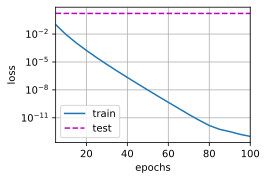

In [13]:
train_concise(0)

L2 norm of w: 0.030656103


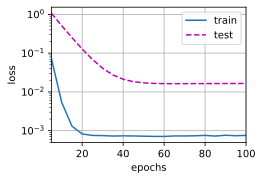

In [14]:
train_concise(3)